<a href="https://colab.research.google.com/github/mcbaccam/Anal-tica-de-Negocio/blob/main/6_An%C3%A1lisis_Sentimientos_Final_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Instalación de los paquetes para el Análisis de Sentimientos. En donde la pregunta de Análisis es ¿Cómo esta el contexto macroeconómico de Colombia para los años 2022 y 2024?

In [1]:
!pip install -U spacy  #Es el tokenizador Análisis de Sentimientos
!spacy download es_core_news_lg  #Diccionario en Español
!spacy download en_core_web_sm  #Diccionario en Ingles

!pip install vaderSentiment
!pip install wordcloud

!pip uninstall numpy
!pip install numpy==1.26

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 886.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's

0. Se procede con la carga de las librerias de trabajo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

#Para cargar los archivos automáticamente del drivefrom google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
nltk.download('punkt') #Optimizador de la maquina
from nltk.sentiment.vader import SentimentIntensityAnalyzer  #Analizador de sentimientos
from nltk.tokenize import word_tokenize,sent_tokenize  #Tokenizador de oraciones

from textblob import TextBlob #Traductor de textos

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1. Se cargan los documentos de análisis

In [4]:
#Se procede con la lectura de los documentos
nxl1=open('/content/drive/MyDrive/InformeANALDEX_2020.txt').read()

nxl_tk1=sent_tokenize(nxl1)
print(nxl_tk1[:5])

['Informe Detallado del Comercio Exterior de Colombia en 2020\n1.', 'Introducción\nEl año 2020 representó un punto de inflexión para la economía global, y Colombia no fue la excepción.', 'La irrupción de la pandemia de COVID-19 generó una crisis sanitaria sin precedentes que impactó drásticamente las cadenas de suministro, las relaciones comerciales internacionales y la demanda interna.', 'En este contexto, el comercio exterior colombiano presentó una serie de particularidades que vale la pena analizar en profundidad.', '2.']


3. Se procede con el análisis de sentimientos.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Detailed Foreign Trade Report of Colombia in 2020
1.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Introduction
The year 2020 represented a turning point for the global economy, and Colombia was no exception.
{'neg': 0.128, 'neu': 0.872, 'pos': 0.0, 'compound': -0.296}
The emergence of the Covid-19 pandemic generated an unprecedented health crisis that drastically impacted supply chains, international commercial relations and domestic demand.
{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.6808}
In this context, Colombian foreign trade presented a series of particularities that are worth analyzing in depth.
{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.2263}
2.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The impact of Covid-19 pandemic on Colombian foreign trade
The Covid-19 pandemic had a devastating effect on the Colombian economy, causing unprecedented economic contraction since the great depression.
{'neg': 0.222, 'neu': 0.665, 'pos': 0.114, 'comp

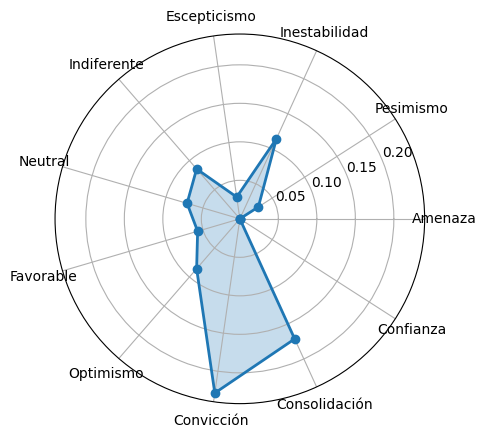

In [5]:
#Traductor de Textos
from textblob import TextBlob
import textblob.exceptions
#import matplotlib.pyplot as plt

#Se cargan las librerias de análisis de sentimientos
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') #diccionario 70 idiomas
sia=SentimentIntensityAnalyzer()

#----------------------------------------------------------------
#Se procede con el análisis de sentimientos - nxl
#----------Contexto 2021-----------------------------------------
XC=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
nXC=np.zeros((11,1))
Xtoks=[];Xpol=[]; pos1=[]

blob=TextBlob(nxl1)
tblob=blob.translate(from_lang='es',to='en')
nxl_tk1=sent_tokenize(str(tblob))

for tokens in nxl_tk1:
  print(tokens)
  scores=sia.polarity_scores(tokens)
  print(scores)
  Xtoks.append(tokens)
  Xpol.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC[pos]=nXC[pos]+1
  pos1.append(pos[0][0])

nXC=nXC/len(nxl_tk1)
nXC[5,]=(nXC[4,]+nXC[6,])/2

#Se crea el informe en un formato Excel - Contexto 2021
dfm=pd.DataFrame(np.column_stack((Xtoks,Xpol,pos1)))
dfm.to_excel('InformeANALDEX_2020.xlsx')

#--------------------------------------------------------
#Se procede con la construcción del gráfico Spider Plot
angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values=np.concatenate((nXC,[nXC[0]]))

labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza']

plt.figure()
plt.polar(angles,values,'o-',linewidth=2)
plt.fill(angles, values,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()
